<a href="https://colab.research.google.com/github/andreabenevenut/LLM_workshop/blob/main/notebooks/1_First_interaction_with_LLMs_via_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OUR FIRST INTERACTION WITH LARGE LANGUAGE MODELS


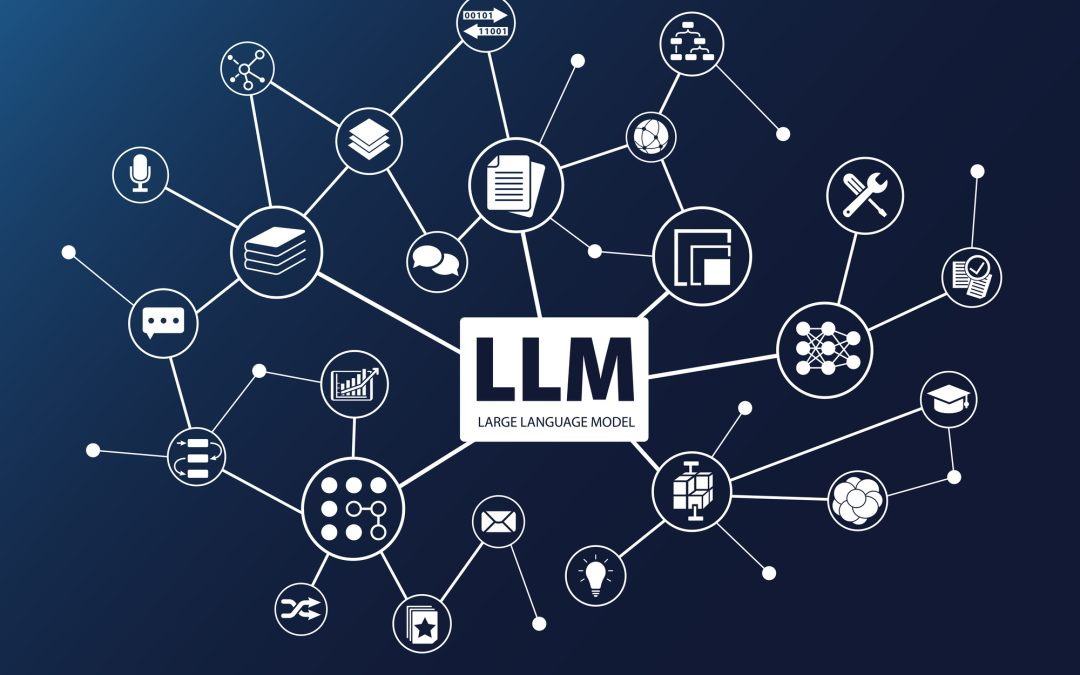


This notebook provides an introductory exploration of Large Language Models (LLMs), showcasing how to interact with them using specific inputs to generate text and conduct diverse language tasks.

While employing a single LLM is enough for basic applications, more intricate tasks often necessitate chaining LLMs. Such chaining involves linking LLMs either with one another or with additional components.

That is where the Python library [LangChain](https://www.langchain.com/) comes in handy. LangChain is an application framework designed to leverage  LLMs' power. The core of such library is the so called "chain". <br>
A `chain` refers to a sequence of interconnected components designed to accomplish a particular task. This sequence dictates the flow of data and tasks within the AI system.

For instance, a simple chain could comprise the following components:

User Input ➡️ Large Language Model ➡️ Output Formatter ➡️ Response

# 0: Set up

In [ ]:
!git clone https://github.com/datarootsio/LLMs_workshop.git

In [ ]:
!pip install -r "/content/LLMs_workshop/requirements.txt"

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = ""

# 1: First API call to use LLMs

Here's an example of how to utilize the OpenAI API to ask a question with specific parameters:

You have the flexibility to fine-tune your query using the following parameters:
- **Temperature:** Adjust this float value from 0 to 1 to control the level of randomness in the Large Language Model's response. Lower values (closer to 0) ensure more deterministic responses, while higher values introduce increased variability.
- **Model Name:** OpenAI provides a comprehensive selection of Large Language Models, each with unique characteristics and capabilities. For more details on the available models, refer to the [OpenAI Models Documentation](https://platform.openai.com/docs/models).


In [ ]:
from openai import OpenAI

In [ ]:
client = OpenAI()

user_request = """
I have a cat and I would like to have a cool name for it, related to summer.
Come up with 5 cool names for my pet.
"""

response = client.chat.completions.create(
  model="gpt-3.5-turbo-1106",
  temperature = 1,
  messages = [{"role": "user", "content": user_request}]
)

print(response.choices[0].message.content)

# 2: Prompt engineering via LangChain

Prompt engineering involves crafting specific input instructions for LLMs to achieve desired outputs/responses.
This process involves fine-tuning the wording, structure, and context of the input prompt to make LLMs more accurate and useful across different tasks, like generating content, solving problems, or understanding language better.

In the following example, we will see how we can define a very simple chain via LangChain. The essential components of our chain are an LLM model, a prompt with instructions and some input variables.

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.chat_models import ChatOpenAI

In [ ]:
llm = ChatOpenAI(temperature=1, model_name="gpt-3.5-turbo-1106")

In [ ]:
my_prompt = PromptTemplate(
    input_variables = ["animal", "element", "nicknames_numbers"],
    input_types={
        "animal": str,
        "element": str,
        "nicknames_numbers": int
        },
    template = """
    I have a {animal} and I would like to have a cool name for it, related to {element}.
    Come up with {nicknames_numbers} cool names for my pet.
    """
    )

In [ ]:
pet_chain = LLMChain(llm=llm, prompt=my_prompt)

In [ ]:
answer = pet_chain({"animal": "dog", "element": "water", "nicknames_numbers": 2})
print(answer['text'])

In [ ]:
answer = pet_chain({"animal": "hamster", "element": "fire", "nicknames_numbers": 10})
print(answer['text'])

# Exercise: Dataroots needs you!

We need to help Dataroots HR department to recruit more people via social media. It would be handy to have a tool that generates Instagram or Linkedin posts where HR can tweak a few parameters to customize the post itself.

Use the LangChain library, prompt engineering and templates to achieve the task.

Suppose that HR would like to decide on the following parameters:
- social_media
- tone (e.g. formal or informal)
- max number of words
- position (e.g. ML Engineer, Data Engineer, Data Strategist, ...)

Be creative and play around to grasp how interactions with LLMs work!